In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv("/Users/aahan_bagga/Desktop/diabetes_data.csv")


print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [186]:
X=df.drop(["Outcome"], axis=1)
Y=df["Outcome"]

In [187]:
#Preprocessing steps

#X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size = 0.8, random_state=42)

kf = KFold(n_splits = 9, shuffle = True, random_state = 19)

for training_index,testing_index in kf.split(X):
    X_train, X_test = X.iloc[training_index], X.iloc[testing_index]
    Y_train, Y_test = Y.iloc[training_index], Y.iloc[testing_index]


scaler = MinMaxScaler() #Standaridzation better than Normalization
x_train_s = scaler.fit_transform(X_train)
x_test_s = scaler.fit_transform(X_test)

# GRAPH TO FIGURE WHAT THE TRHESHOLD VALUE IS
# EXPERIMENT WITH PREDICT_PROBA AND FUNCTIONS
# THEN USE GRIDSEARCH CV EXHAUSTIVE SEARCH TO TUNE HYPERPARAMS
# USE THE LOG-LOSS FUNCTION IN GRID SEARCH "neg_log_loss" as scoring parameter of grid search

In [188]:
model = LogisticRegression(max_iter = 2000)
model.fit(x_train_s,Y_train)
y_pred = model.predict(x_test_s)


In [189]:
acc = accuracy_score(Y_test, y_pred)
print(acc)

0.8117647058823529


In [190]:
#print(x_test_s)
#print(x_test_s)
print(X_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
19             1      115             70             30       96  34.6   
32             3       88             58             11       54  24.8   
52             5       88             66             21       23  24.4   
53             8      176             90             34      300  33.7   
55             1       73             50             10        0  23.0   
..           ...      ...            ...            ...      ...   ...   
707            2      127             46             21      335  34.4   
708            9      164             78              0        0  32.8   
732            2      174             88             37      120  44.5   
757            0      123             72              0        0  36.3   
760            2       88             58             26       16  28.4   

     DiabetesPedigreeFunction  Age  
19                      0.529   32  
32                      0.267   22  


In [191]:
c = model.predict_proba([x_test_s[80]])
c
threshold = 0.5
if c[0, 1] > threshold:
    print("Diabetes")
else:
    print("No Diabetes")



No Diabetes


In [192]:
[[X_test.iloc[80].values]]

[[array([2.00e+00, 1.27e+02, 4.60e+01, 2.10e+01, 3.35e+02, 3.44e+01,
         1.76e-01, 2.20e+01])]]

In [193]:
X.values

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

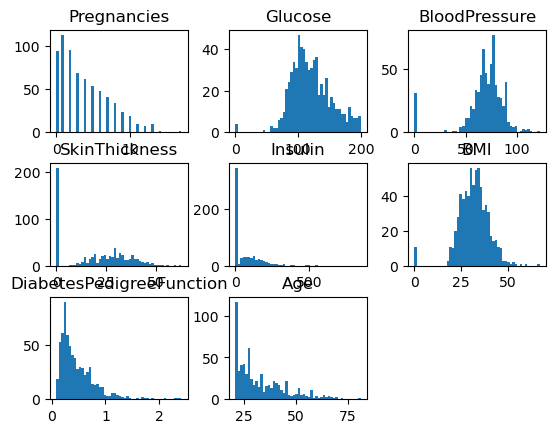

In [196]:
X_train.hist(bins = 50, grid = False)

<Axes: >

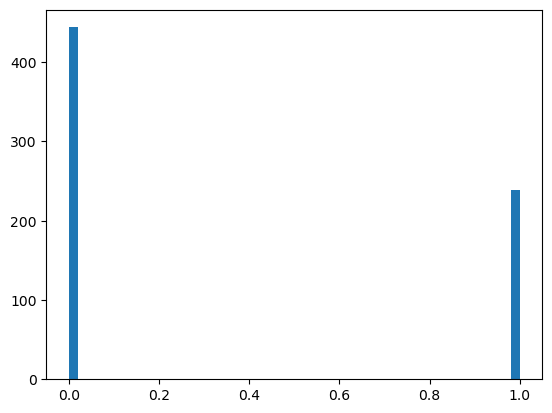

In [197]:
Y_train.hist(bins = 50, grid = False)